In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv("Admission_Prediction (1).csv")

In [7]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [9]:
#missing value treatment
df.isnull().sum()/len(df)*100

Serial No.           0.0
GRE Score            3.0
TOEFL Score          2.0
University Rating    3.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

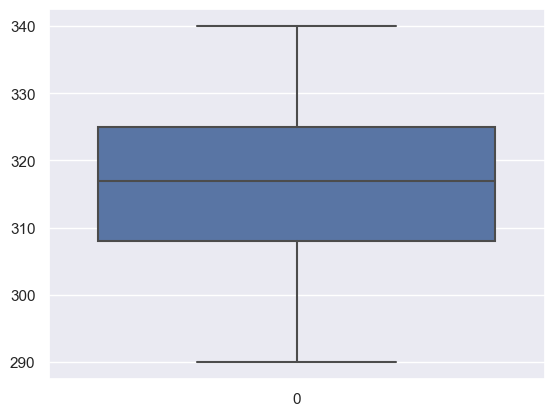

In [11]:
#missing value is less than 25 percentage, so need to perform missing value treatment
sns.boxplot(df["GRE Score"])
plt.show()

In [13]:
#no outliers, hence mean
df["GRE Score"]=df["GRE Score"].fillna(df["GRE Score"].mean())

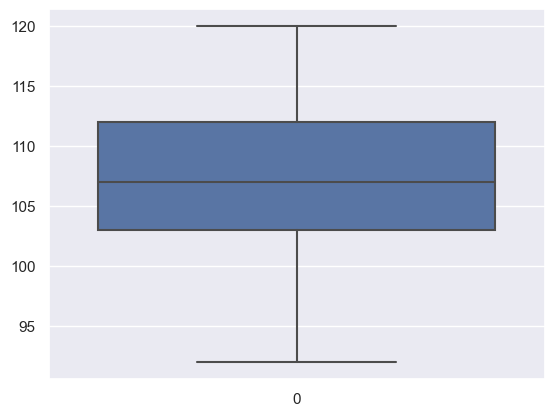

In [14]:
sns.boxplot(df["TOEFL Score"])
plt.show()

In [15]:
#no outliers, hence mean
df["TOEFL Score"]=df["TOEFL Score"].fillna(df["TOEFL Score"].mean())

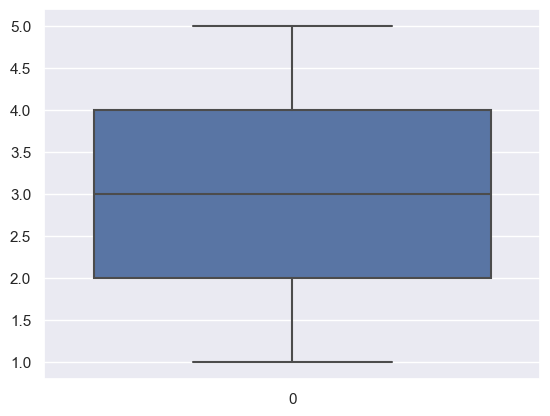

In [16]:
sns.boxplot(df["University Rating"])
plt.show()

In [17]:
#no outliers, hence mean
df["University Rating"]=df["University Rating"].fillna(df["University Rating"].mean())

In [18]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [19]:
#encoding not required as it's all numeric variable
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128802,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


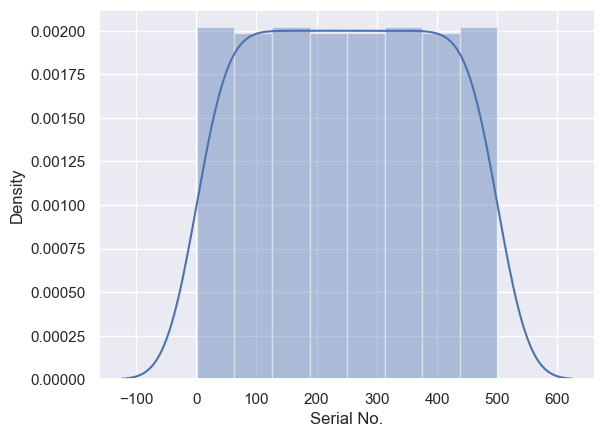

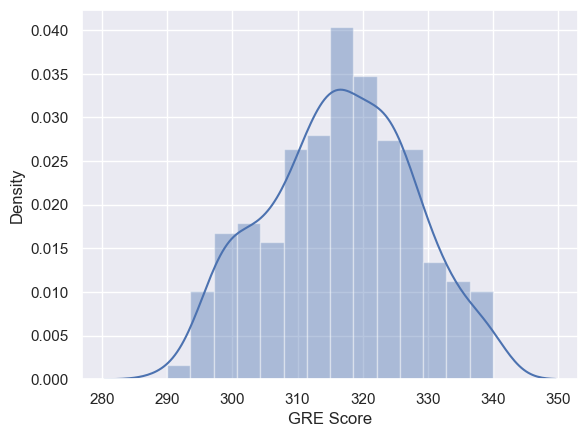

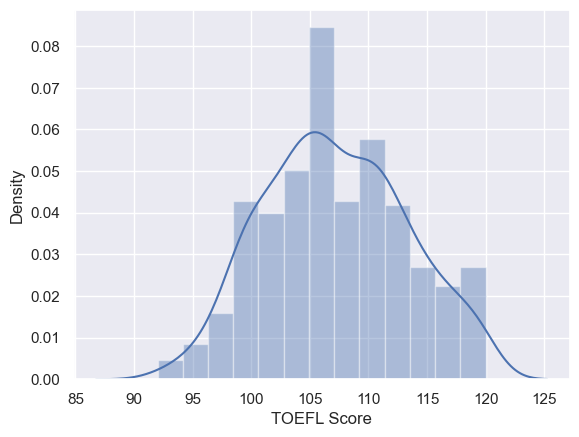

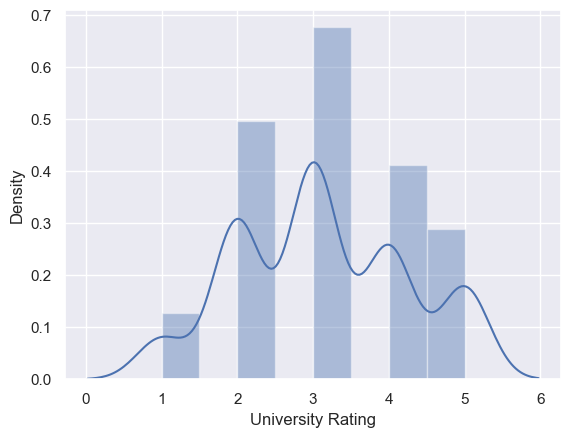

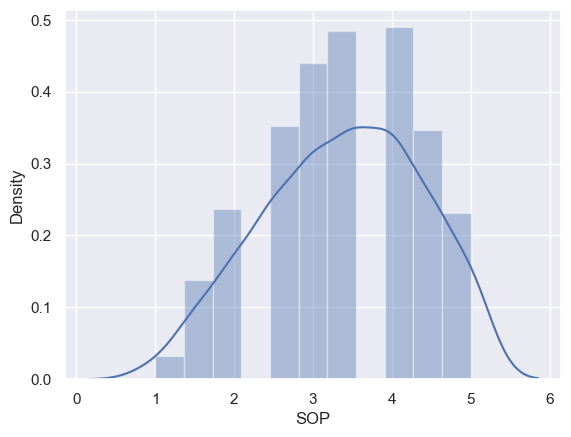

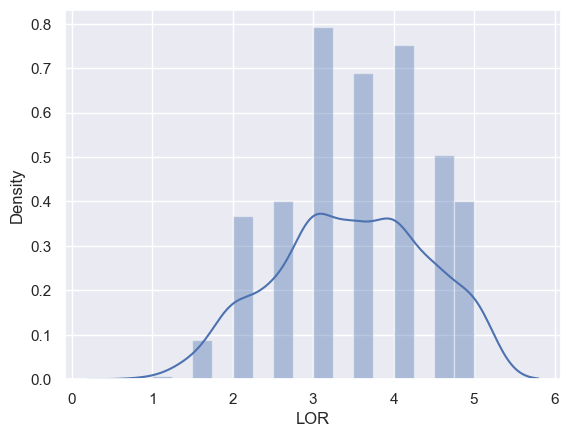

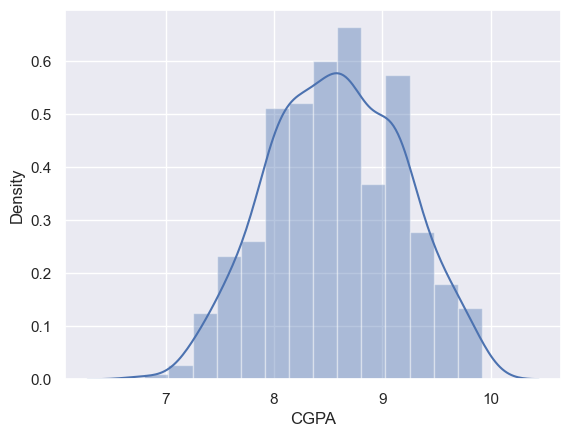

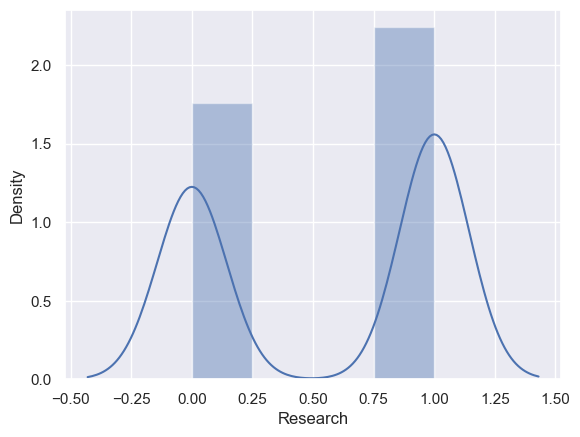

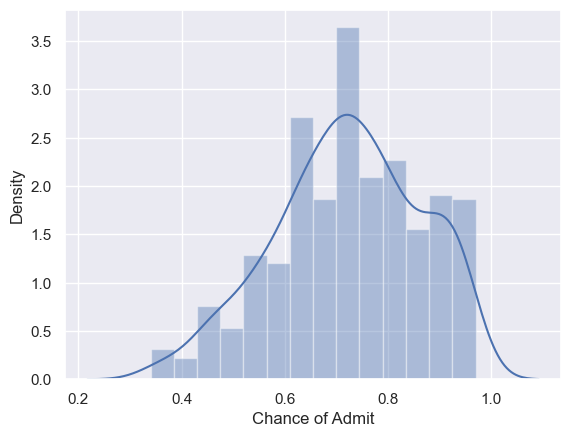

In [20]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df.columns)[0:]:
    distplots(i)

In [21]:
#splitting the data into train and test for feature scaling

In [22]:
x=df.drop(columns="Chance of Admit")
y=df["Chance of Admit"]

In [23]:
x.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,2,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,3,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,4,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,5,314.000000,103.0,2.0,2.0,3.0,8.21,0


In [24]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4,5,6,7
0,-1.728590,1.842741e+00,1.788542,0.778906,1.137360,1.098944,1.776806,0.886405
1,-1.721662,6.708143e-01,-0.031058,0.778906,0.632315,1.098944,0.485859,0.886405
2,-1.714734,5.124333e-15,-0.527313,-0.107877,-0.377773,0.017306,-0.954043,0.886405
3,-1.707806,4.905178e-01,0.465197,-0.107877,0.127271,-1.064332,0.154847,0.886405
4,-1.700877,-2.306679e-01,-0.692731,-0.994659,-1.387862,-0.523513,-0.606480,-1.128152
...,...,...,...,...,...,...,...,...
495,1.700877,1.392000e+00,0.134360,1.665688,1.137360,0.558125,0.734118,0.886405
496,1.707806,1.842741e+00,1.623124,1.665688,1.642404,1.639763,2.140919,0.886405
497,1.714734,1.211704e+00,2.119379,1.665688,1.137360,1.639763,1.627851,0.886405
498,1.721662,-4.109644e-01,-0.692731,0.778906,0.632315,1.639763,-0.242367,-1.128152


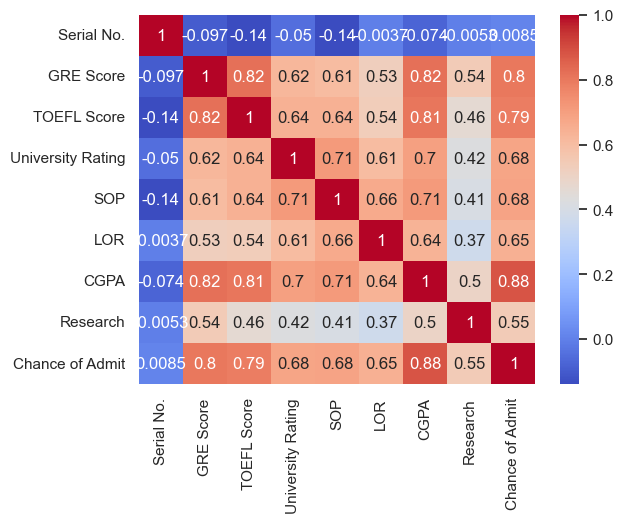

In [30]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable=sc_x

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i ) for i in range(variable.shape[1])]

vif['Features'] = x.columns

In [34]:
vif

,Variance Inflation Factor,Features
0,1.054616,Serial No.
1,4.154482,GRE Score
2,3.836043,TOEFL Score
3,2.517489,University Rating
4,2.839768,SOP
5,2.057404,LOR
6,4.664184,CGPA
7,1.463517,Research


In [35]:
sc_x=sc_x.drop(column="University Rating")

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [36]:
sc_x=pd.DataFrame(sc_x)

In [37]:
sc_x

,0,1,2,3,4,5,6,7
0,-1.728590,1.842741e+00,1.788542,0.778906,1.137360,1.098944,1.776806,0.886405
1,-1.721662,6.708143e-01,-0.031058,0.778906,0.632315,1.098944,0.485859,0.886405
2,-1.714734,5.124333e-15,-0.527313,-0.107877,-0.377773,0.017306,-0.954043,0.886405
3,-1.707806,4.905178e-01,0.465197,-0.107877,0.127271,-1.064332,0.154847,0.886405
4,-1.700877,-2.306679e-01,-0.692731,-0.994659,-1.387862,-0.523513,-0.606480,-1.128152
...,...,...,...,...,...,...,...,...
495,1.700877,1.392000e+00,0.134360,1.665688,1.137360,0.558125,0.734118,0.886405
496,1.707806,1.842741e+00,1.623124,1.665688,1.642404,1.639763,2.140919,0.886405
497,1.714734,1.211704e+00,2.119379,1.665688,1.137360,1.639763,1.627851,0.886405
498,1.721662,-4.109644e-01,-0.692731,0.778906,0.632315,1.639763,-0.242367,-1.128152


In [61]:
#dropping University Rating because of multicollinearity
#sc_x=sc_x.drop(columns=3,axis=1)

In [44]:
sc_x

,0,1,2,4,5,6,7
0,-1.728590,1.842741e+00,1.788542,1.137360,1.098944,1.776806,0.886405
1,-1.721662,6.708143e-01,-0.031058,0.632315,1.098944,0.485859,0.886405
2,-1.714734,5.124333e-15,-0.527313,-0.377773,0.017306,-0.954043,0.886405
3,-1.707806,4.905178e-01,0.465197,0.127271,-1.064332,0.154847,0.886405
4,-1.700877,-2.306679e-01,-0.692731,-1.387862,-0.523513,-0.606480,-1.128152
...,...,...,...,...,...,...,...
495,1.700877,1.392000e+00,0.134360,1.137360,0.558125,0.734118,0.886405
496,1.707806,1.842741e+00,1.623124,1.642404,1.639763,2.140919,0.886405
497,1.714734,1.211704e+00,2.119379,1.137360,1.639763,1.627851,0.886405
498,1.721662,-4.109644e-01,-0.692731,0.632315,1.639763,-0.242367,-1.128152


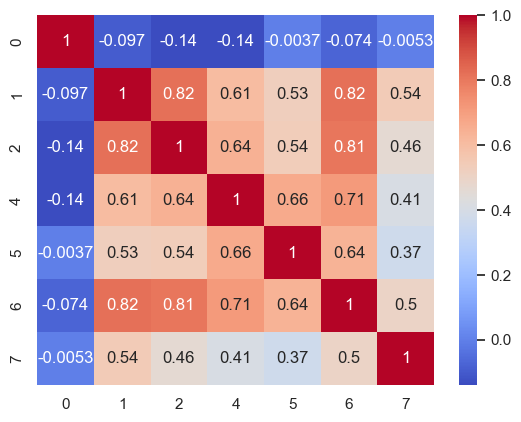

In [46]:
corr=sc_x.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [49]:
x1=x.copy()

In [50]:
x1=x1.drop(columns="University Rating",axis=1)

In [51]:
x1.head()

,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research
0,1,337.000000,118.0,4.5,4.5,9.65,1
1,2,324.000000,107.0,4.0,4.5,8.87,1
2,3,316.558763,104.0,3.0,3.5,8.00,1
3,4,322.000000,110.0,3.5,2.5,8.67,1
4,5,314.000000,103.0,2.0,3.0,8.21,0


In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable=sc_x

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i ) for i in range(variable.shape[1])]

vif['Features'] = x1.columns

In [53]:
vif

,Variance Inflation Factor,Features
0,1.050963,Serial No.
1,4.147630,GRE Score
2,3.792699,TOEFL Score
3,2.505223,SOP
4,2.013350,LOR
5,4.578229,CGPA
6,1.458529,Research


In [65]:
#dropping serail number as it's unique variable

In [66]:
sc_x=sc_x.drop(columns=0,axis=1)

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(sc_x,y,test_size=0.25,random_state=100)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [70]:
y_pred_price = lm.predict(x_test)
y_pred_price_train = lm.predict(x_train)

In [71]:

from sklearn.metrics import r2_score
r2_score(y_test, y_pred_price)

0.8247313613551985

In [72]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_price_train)

0.8165402584039704

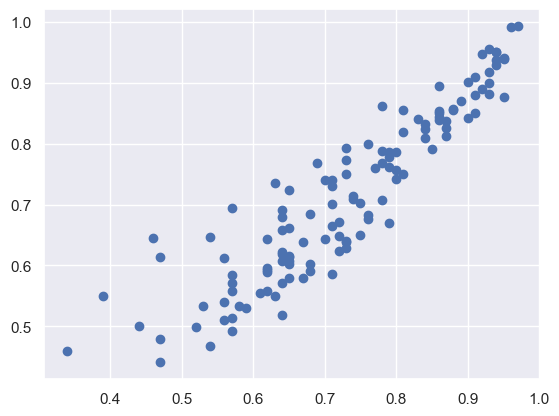

In [73]:
plt.scatter(y_test, y_pred_price)

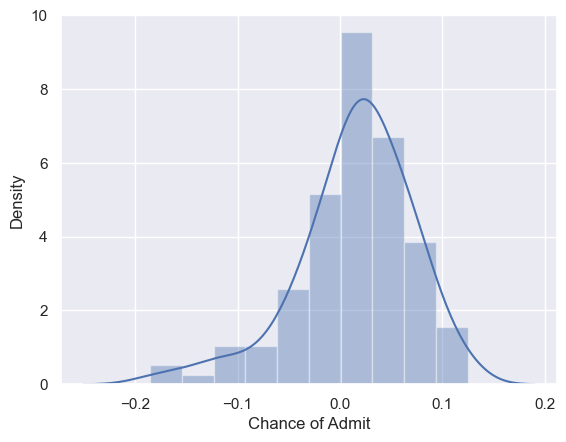

In [75]:
sns.distplot((y_test - y_pred_price), bins=10)
plt.show()